In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector


from tqdm import tqdm
import timeit

from utils import *
%autoreload 2

In [3]:
signal_tree = Tree(fc.NMSSM_MX_700_MY_400)
signal_selection = Selection(signal_tree)

In [31]:
qcd_tree = Tree(fc.QCD_Pt_List)
qcd_selection = Selection(qcd_tree)

In [17]:
def plot_ijet(selections,varname,ijet,labels=None,figax=None):
    if figax is None: figax = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
    fig,axs = figax
    
    jet_varinfo = varinfo[varname]

    hists = [ selection[varname][:,ijet] for selection in selections ]
    weights = [ selection["scale"] for selection in selections ]
    
    info = varinfo[varname]

    hist_multi(hists,labels=labels,weights=weights,density=1,**info,figax=(fig,axs))

In [25]:
def plot_jets(selections,varname,labels=None,figax=None):
    if figax is None: figax = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
    fig,axs = figax
    
    jet_varinfo = varinfo[varname]

    hists = [ selection[varname] for selection in selections ]
    weights = [ selection["jet_scale"] for selection in selections ]
    
    info = varinfo[varname]

    hist_multi(hists,labels=labels,weights=weights,density=1,**info,figax=(fig,axs))

In [22]:
sort_var = "jet_pt"
signal_selection.sort_jets(sort_var)
qcd_selection.sort_jets(sort_var)

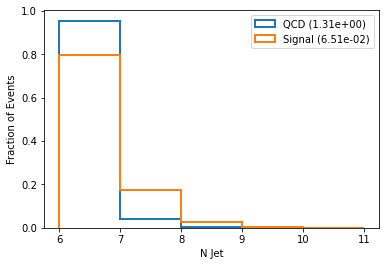

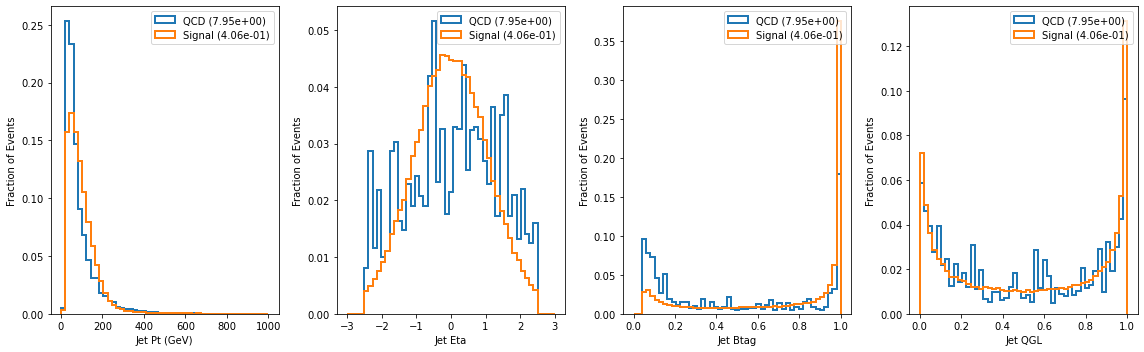

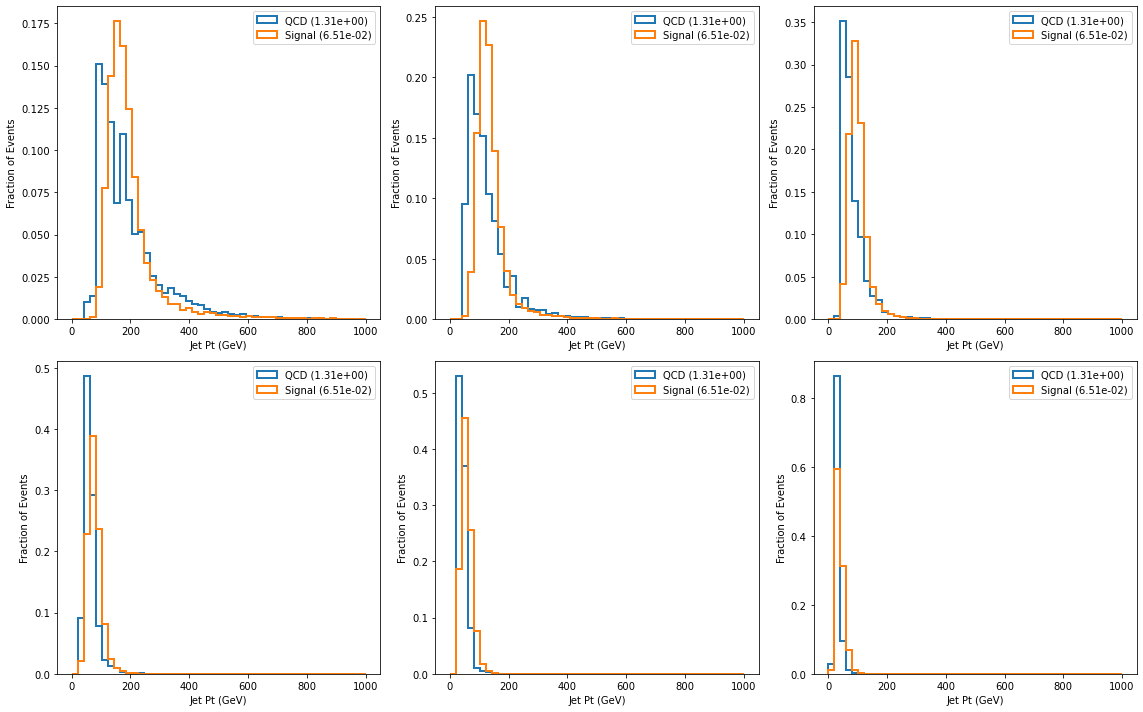

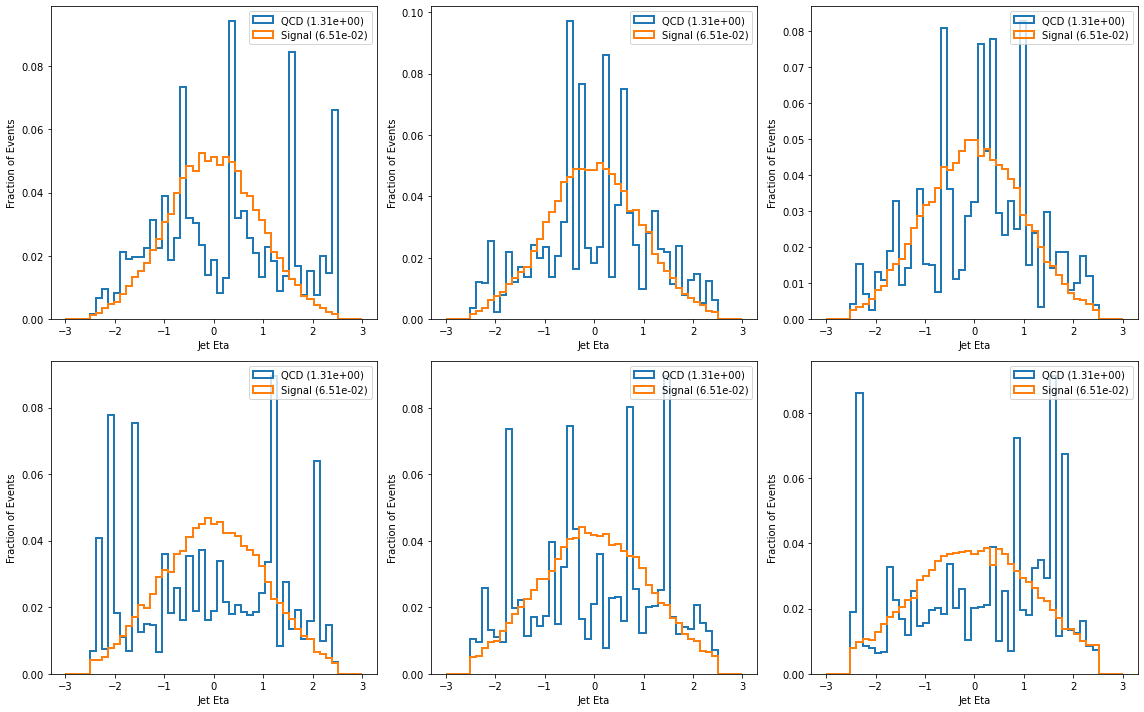

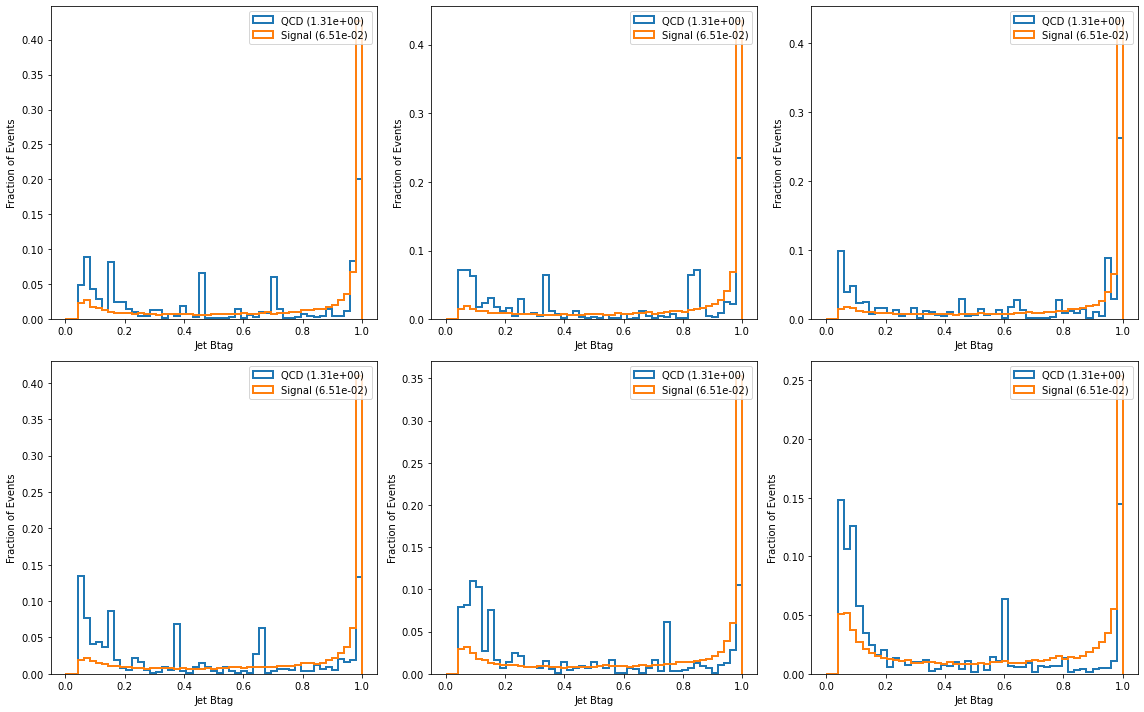

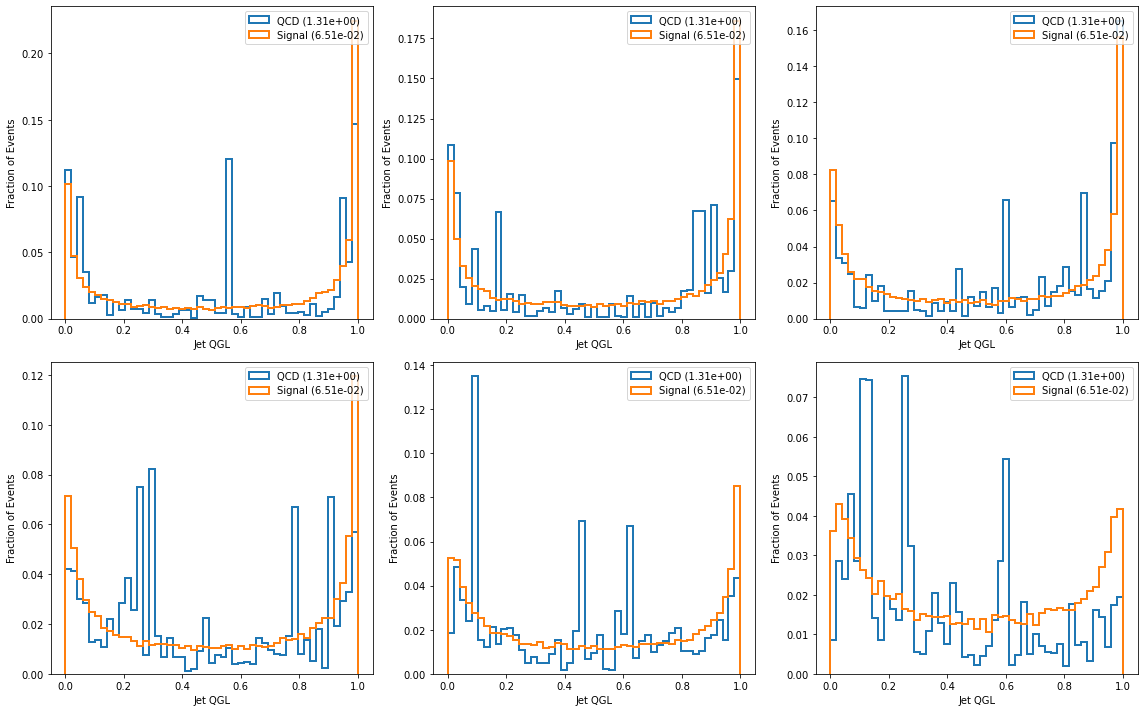

In [28]:
selection_list = [qcd_selection,signal_selection]
labels = ["QCD","Signal"]
varlist = ["jet_pt","jet_eta","jet_btag","jet_qgl"]

n_jet_list = [selection["n_jet"] for selection in selection_list]
weights = [ selection["scale"] for selection in selection_list ]
hist_multi(n_jet_list,labels=labels,weights=weights,density=1,bins=range(6,12),xlabel="N Jet")

nrows,ncols = 1,4
fig,axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(16,5))
for i,varname in enumerate(varlist):
    plot_jets(selection_list,varname,labels=labels,figax=(fig,axs[i]))
fig.tight_layout()

for varname in varlist:
    nrows,ncols = 2,3
    fig,axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(16,10))
    for ijet in range(6): 
        figax=(fig,axs[ijet//ncols,ijet%ncols])
        plot_ijet(selection_list,varname,ijet,labels=labels,figax=figax)
    fig.tight_layout()